# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | candido mota
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | bubaque
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | cartagena
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | charters towers
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | hornell
Processing Record 13 of Set 1 | susuman
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | kailua-kona
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | zhezqazghan
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | conde
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | yellowk

Processing Record 38 of Set 4 | nar'yan-mar
Processing Record 39 of Set 4 | murmashi
Processing Record 40 of Set 4 | kavaratti
Processing Record 41 of Set 4 | vohipaho
City not found. Skipping...
Processing Record 42 of Set 4 | ghanzi
Processing Record 43 of Set 4 | port alfred
Processing Record 44 of Set 4 | haiku-pauwela
Processing Record 45 of Set 4 | tara
Processing Record 46 of Set 4 | vila velha
Processing Record 47 of Set 4 | chilecito
Processing Record 48 of Set 4 | kuala belait
Processing Record 49 of Set 4 | dakhla
Processing Record 0 of Set 5 | sechura
Processing Record 1 of Set 5 | ola
Processing Record 2 of Set 5 | el abiodh sidi cheikh
Processing Record 3 of Set 5 | tosontsengel
Processing Record 4 of Set 5 | midvagur
Processing Record 5 of Set 5 | babaeski
Processing Record 6 of Set 5 | qui nhon
Processing Record 7 of Set 5 | gebeit
Processing Record 8 of Set 5 | chabahar
Processing Record 9 of Set 5 | tocoa
Processing Record 10 of Set 5 | aldan
Processing Record 11 of S

Processing Record 28 of Set 8 | mersa matruh
Processing Record 29 of Set 8 | rabo de peixe
Processing Record 30 of Set 8 | tamalin
Processing Record 31 of Set 8 | acarau
Processing Record 32 of Set 8 | arrifes
Processing Record 33 of Set 8 | kapa'a
Processing Record 34 of Set 8 | taoudenni
Processing Record 35 of Set 8 | medina
Processing Record 36 of Set 8 | jinghong
Processing Record 37 of Set 8 | tulagi
Processing Record 38 of Set 8 | lorengau
Processing Record 39 of Set 8 | linfen
Processing Record 40 of Set 8 | belokurikha
Processing Record 41 of Set 8 | fiambala
Processing Record 42 of Set 8 | zhalantun
Processing Record 43 of Set 8 | massenya
Processing Record 44 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 45 of Set 8 | nikel
Processing Record 46 of Set 8 | yorkton
Processing Record 47 of Set 8 | kilindoni
Processing Record 48 of Set 8 | kruisfontein
Processing Record 49 of Set 8 | sumbe
Processing Record 0 of Set 9 | kismayo
Processing Record 1 of Set 9 

Processing Record 19 of Set 12 | ocean pointe
City not found. Skipping...
Processing Record 20 of Set 12 | alice springs
Processing Record 21 of Set 12 | chifeng
Processing Record 22 of Set 12 | pekanbaru
Processing Record 23 of Set 12 | kasongo
Processing Record 24 of Set 12 | okhotsk
Processing Record 25 of Set 12 | bodaybo
Processing Record 26 of Set 12 | bardaskan
City not found. Skipping...
Processing Record 27 of Set 12 | paita
Processing Record 28 of Set 12 | east grand forks
Processing Record 29 of Set 12 | costa calma
City not found. Skipping...
Processing Record 30 of Set 12 | lushnje
Processing Record 31 of Set 12 | salyan
Processing Record 32 of Set 12 | muar
Processing Record 33 of Set 12 | nizhnesortymskiy
Processing Record 34 of Set 12 | san antonio de pale
Processing Record 35 of Set 12 | salavan
Processing Record 36 of Set 12 | darovskoy
Processing Record 37 of Set 12 | lianhe
Processing Record 38 of Set 12 | howrah
Processing Record 39 of Set 12 | chibougamau
Processi

In [4]:
city_data

[{'City': 'candido mota',
  'Lat': -22.7464,
  'Lng': -50.3869,
  'Max Temp': 19.51,
  'Humidity': 93,
  'Cloudiness': 95,
  'Wind Speed': 3.28,
  'Country': 'BR',
  'Date': 1702266663},
 {'City': 'lihue',
  'Lat': 21.9789,
  'Lng': -159.3672,
  'Max Temp': 24.77,
  'Humidity': 84,
  'Cloudiness': 75,
  'Wind Speed': 4.12,
  'Country': 'US',
  'Date': 1702266530},
 {'City': 'bubaque',
  'Lat': 11.2833,
  'Lng': -15.8333,
  'Max Temp': 28.09,
  'Humidity': 59,
  'Cloudiness': 100,
  'Wind Speed': 4.57,
  'Country': 'GW',
  'Date': 1702266663},
 {'City': 'ilulissat',
  'Lat': 69.2167,
  'Lng': -51.1,
  'Max Temp': -1.99,
  'Humidity': 64,
  'Cloudiness': 100,
  'Wind Speed': 9.26,
  'Country': 'GL',
  'Date': 1702266663},
 {'City': 'whitehorse',
  'Lat': 60.7161,
  'Lng': -135.0538,
  'Max Temp': -10.66,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 8.23,
  'Country': 'CA',
  'Date': 1702266664},
 {'City': 'cartagena',
  'Lat': 10.3997,
  'Lng': -75.5144,
  'Max Temp': 26.79,
  

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,candido mota,-22.7464,-50.3869,19.51,93,95,3.28,BR,1702266663
1,lihue,21.9789,-159.3672,24.77,84,75,4.12,US,1702266530
2,bubaque,11.2833,-15.8333,28.09,59,100,4.57,GW,1702266663
3,ilulissat,69.2167,-51.1000,-1.99,64,100,9.26,GL,1702266663
4,whitehorse,60.7161,-135.0538,-10.66,84,100,8.23,CA,1702266664


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,candido mota,-22.7464,-50.3869,19.51,93,95,3.28,BR,1702266663
1,lihue,21.9789,-159.3672,24.77,84,75,4.12,US,1702266530
2,bubaque,11.2833,-15.8333,28.09,59,100,4.57,GW,1702266663
3,ilulissat,69.2167,-51.1000,-1.99,64,100,9.26,GL,1702266663
4,whitehorse,60.7161,-135.0538,-10.66,84,100,8.23,CA,1702266664


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

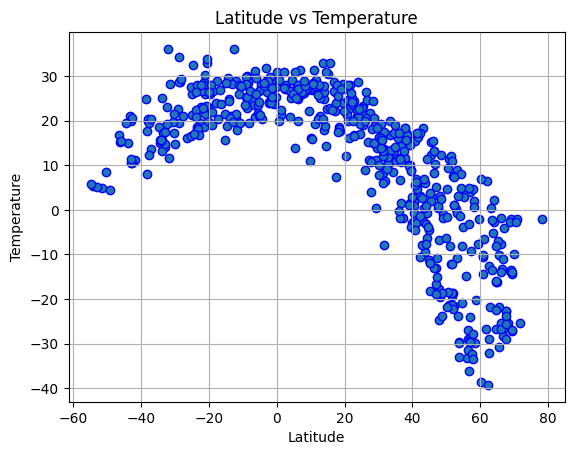

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

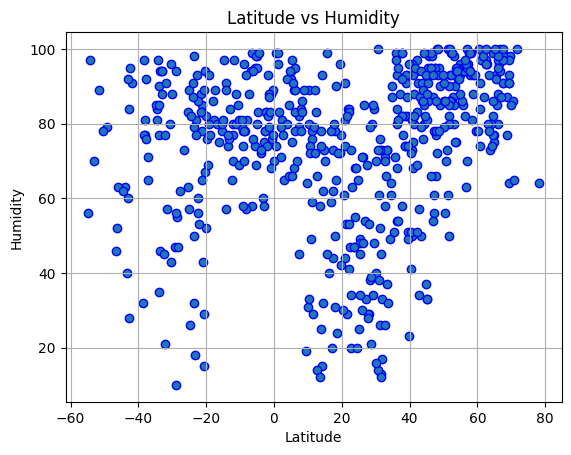

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

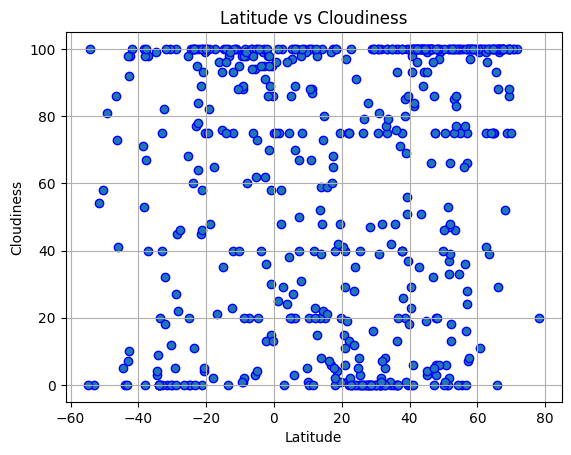

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

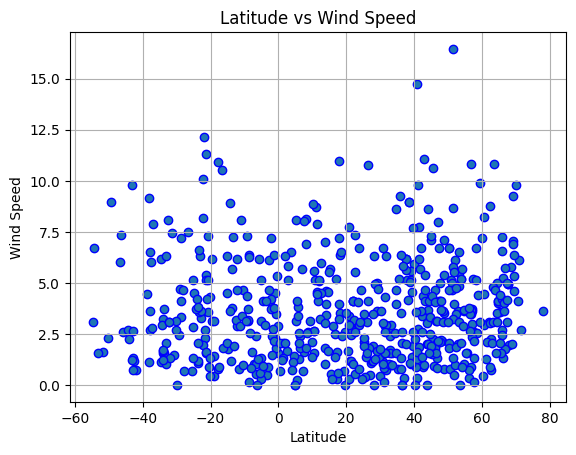

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,regress_values,"--", color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(r_value**2,2)}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lihue,21.9789,-159.3672,24.77,84,75,4.12,US,1702266530
2,bubaque,11.2833,-15.8333,28.09,59,100,4.57,GW,1702266663
3,ilulissat,69.2167,-51.1000,-1.99,64,100,9.26,GL,1702266663
4,whitehorse,60.7161,-135.0538,-10.66,84,100,8.23,CA,1702266664
5,cartagena,10.3997,-75.5144,26.79,89,20,1.54,CO,1702266664


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,candido mota,-22.7464,-50.3869,19.51,93,95,3.28,BR,1702266663
7,charters towers,-20.1000,146.2667,27.57,52,100,4.30,AU,1702266503
10,atafu village,-8.5421,-172.5159,28.54,78,100,6.35,TK,1702266665
16,edinburgh of the seven seas,-37.0676,-12.3116,13.64,71,98,7.88,SH,1702266666
18,adamstown,-25.0660,-130.1015,21.31,57,0,2.84,PN,1702266667


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is 0.7


Text(0.5, 1.0, 'Temperature vs. Latitude')

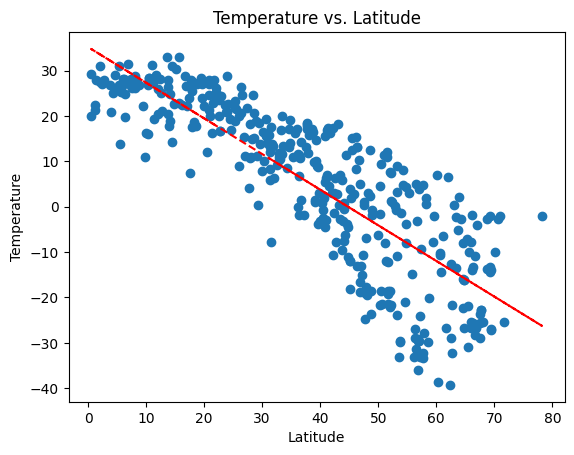

In [16]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Temperature vs. Latitude")

The r-value between Lat and Max Temp is 0.43


Text(0.5, 1.0, 'Temperature vs. Latitude')

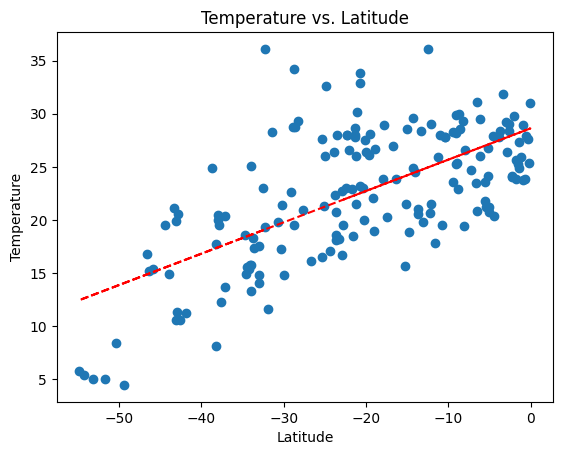

In [17]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Temperature vs. Latitude")

**Discussion about the linear relationship:** In northern hemisphere, a city's latitude and temperature have a strong positive coorelation(0.7)that is to say the higher latitude of the city, the lower temperature the city would be. On the contrary, in southern hemisphere, a city's latitude and temperature have a fair positive coorelation(0.43) - that is to say the higher latitude of the city, the higher temperature the city would be.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.16


Text(0.5, 1.0, 'Humidity vs. Latitude')

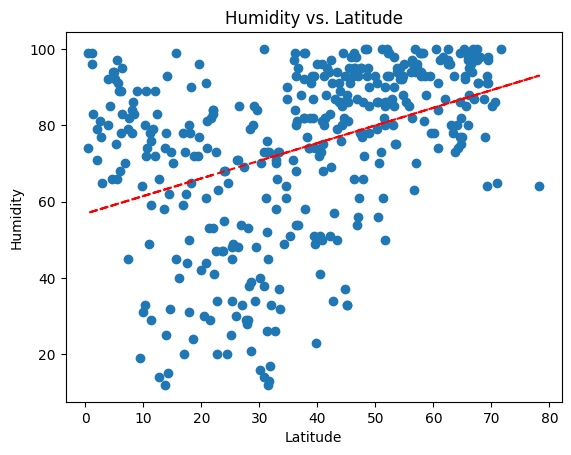

In [18]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs. Latitude")

The r-value between Lat and Humidity is 0.05


Text(0.5, 1.0, 'Humidity vs. Latitude')

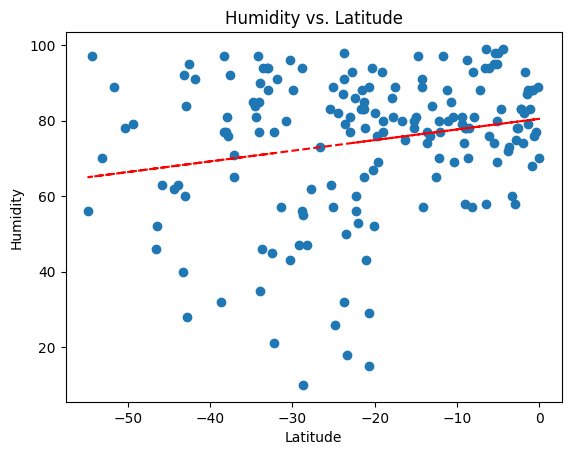

In [19]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs. Latitude")

**Discussion about the linear relationship:** In northern hemisphere, a city's latitude and humidity have a weak positive coorelation(0.16) that is to say with latitude increase, city's humidity is likely to increase but not much. In the southern hemisphere, a city's latitude and humidity also have a weak positive coorelation(0.05) so with latitude increase, city's humidity is likely to increase as well.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.09


Text(0.5, 1.0, 'Cloudiness vs. Latitude')

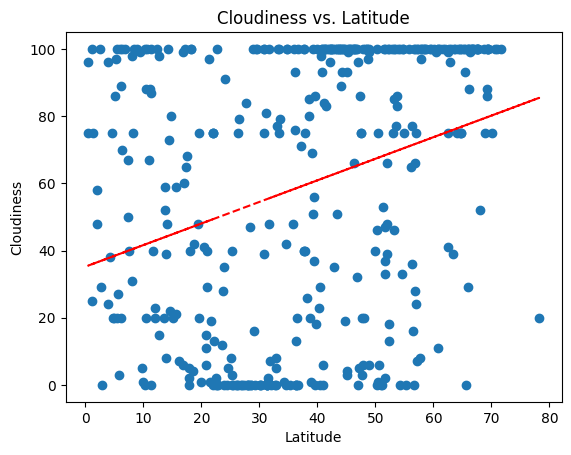

In [20]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness vs. Latitude")

The r-value between Lat and Cloudiness is 0.07


Text(0.5, 1.0, 'Cloudiness vs. Latitude')

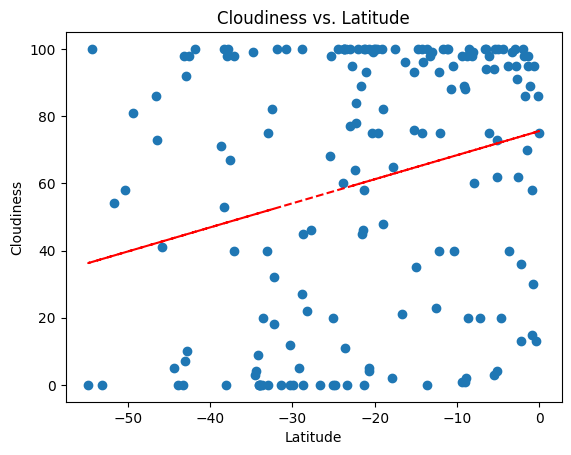

In [21]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness vs. Latitude")


**Discussion about the linear relationship:** In northern hemisphere, a city's latitude and cloudiness level have almost no coorelation(0.09) that is to say a city's cloudiness level does not much related to its latitude. In the southern hemisphere, it is the same situation with almost no coorelation(0.07) between city's latitude and cloudiness level.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.02


Text(0.5, 1.0, 'Wind Speed vs. Latitude')

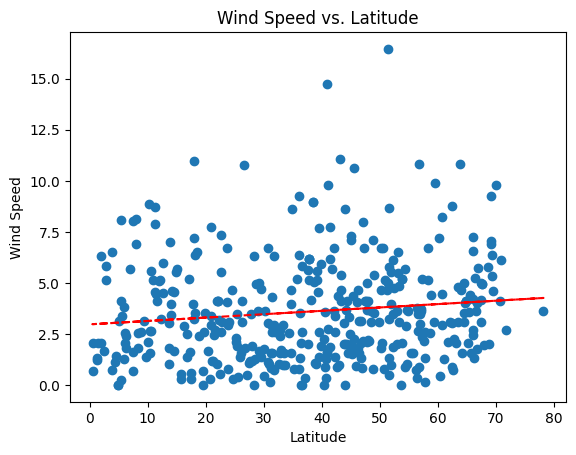

In [22]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs. Latitude")

The r-value between Lat and Wind Speed is 0.0


Text(0.5, 1.0, 'Wind Speed vs. Latitude')

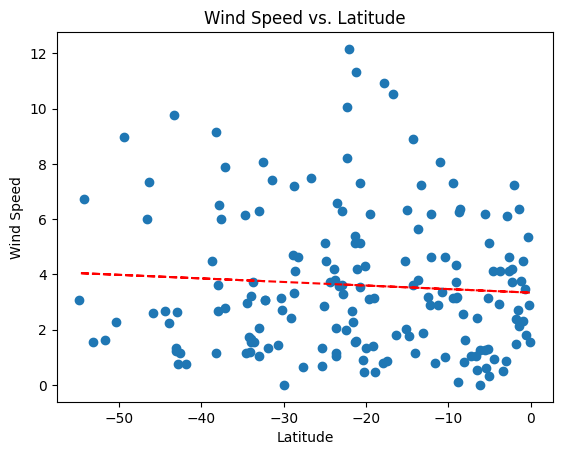

In [23]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs. Latitude")


**Discussion about the linear relationship:**  In northern hemisphere, a city's latitude and wind speed have no coorelation(0.02) that is to say a city's windy level does not much related to its latitude. In the southern hemisphere, it is the same situation the city's latitude and wind speed have no coorelation(0.00) 